# Árbol de decisión con scikit-learn

In [ ]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [ ]:
#Cargamos dataset a utilizar
titanic = pd.read_csv("/content/titanic.csv")

## Exploración de datos

In [ ]:
#Visualizacion del DataFrame
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [ ]:
#Eliminamos las columnas que no nos interesan
columns_drop = ["Name", "Fare"]
titanic.drop(columns_drop, axis = "columns", inplace = True)

In [ ]:
#Renombramos las columnas
titanic.columns = ["Survived",	"Pclass",	"Sex",	"Age", "SibSp", "ParCh"]
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [ ]:
#Analizamos el shape del objeto
print(titanic.shape)

(887, 6)


In [ ]:
#Visualizamos los tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
ParCh         int64
dtype: object

In [ ]:
#Cambiamos los tipos de datos
titanic = pd.get_dummies(titanic, columns = ["Sex"], drop_first = True)

In [ ]:
titanic.dtypes

Survived      int64
Pclass        int64
Age         float64
SibSp         int64
ParCh         int64
Sex_male      uint8
dtype: object

In [ ]:
titanic.head()

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [ ]:
#Reemplazar el DataFrame
titanic.rename(columns = {"Sex_male": "Sex"}, inplace = True )

In [ ]:
#Ordenar columnas por nombres
titanic = titanic[["Survived",	"Pclass",	"Sex", "Age",	"SibSp",	"ParCh"]]

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [ ]:
#Separamos en X e y
X = titanic.drop("Survived", axis = 1)
y = titanic.Survived

In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 00000)

In [ ]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth = 2, random_state = 00000 )

In [ ]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [ ]:
#Calculo de las predicciones en Train y Test
train_prediction = tree.predict(X_train)
test_prediction = tree.predict(X_test)


In [ ]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, train_prediction)
print("The accuracy train is:", train_accuracy)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, test_prediction)
print("The accuracy test is:", test_accuracy)

The accuracy train is: 0.8048387096774193
The accuracy test is: 0.7640449438202247


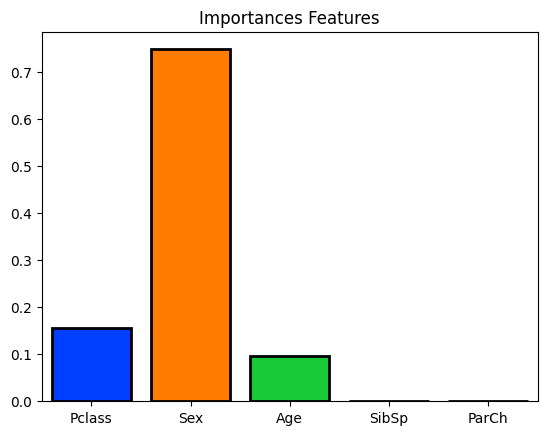

In [ ]:
#Verificamos el feature importances
import seaborn as sns

feature_importances = tree.feature_importances_
columns = X.columns

sns.barplot(x = columns, y = feature_importances, palette = "bright", saturation = 2.0, edgecolor = "black", linewidth = 2)
plt.title("Importances Features")
plt.show()



**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo.